In [148]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from typing import List
from dataclasses import dataclass

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 17


# Discrete ETT-small

discrete_ett_small_hc0_results_dir = Path.cwd().parent / "results" / "discrete_forecasting" / \
    "data-ETT-small_bs-16_lr-0.001_seq-96_pred-96_hc-0_noise-0.2"


discrete_ett_small_hc1_results_dir = Path.cwd().parent / "results" / "discrete_forecasting" / \
    "data-ETT-small_bs-16_lr-0.001_seq-96_pred-96_hc-1_noise-0.2"

# Discrete Synthetic hf0

discrete_synthetic_hf0_hc0_results_dir = Path.cwd().parent / "results" / "discrete_forecasting" / \
    "data-synthetic_hf0_bs-16_lr-0.001_seq-96_pred-96_hc-0_noise-0.2"


discrete_synthetic_hf0_hc1_results_dir = Path.cwd().parent / "results" / "discrete_forecasting" / \
    "data-synthetic_hf0_bs-16_lr-0.001_seq-96_pred-96_hc-1_noise-0.2"

# Discrete Synthetic hf1

discrete_synthetic_hf1_hc0_results_dir = Path.cwd().parent / "results" / "discrete_forecasting" / \
    "data-synthetic_hf1_bs-16_lr-0.001_seq-96_pred-96_hc-0_noise-0.2"


discrete_synthetic_hf1_hc1_results_dir = Path.cwd().parent / "results" / "discrete_forecasting" / \
    "data-synthetic_hf1_bs-16_lr-0.001_seq-96_pred-96_hc-1_noise-0.2"


# Linear ETT-small

linear_ett_small_results_dir = Path.cwd().parent / "results" / "baseline_forecasting" / \
    "model-linear_data-ETT-small_seq-96_pred-96_noise-0.2"


# Linear Synthetic hf0

linear_synthetic_hf0_results_dir = Path.cwd().parent / "results" / "baseline_forecasting" / \
    "model-linear_data-synthetic_hf0_seq-96_pred-96_noise-0.2"


# Linear Synthetic hf1

linear_synthetic_hf1_results_dir = Path.cwd().parent / "results" / "baseline_forecasting" / \
    "model-linear_data-synthetic_hf1_seq-96_pred-96_noise-0.2"

In [149]:
@dataclass
class ForecastResult:
    model_id: str
    results_dir: Path


def create_forecast_results_table(results: List[ForecastResult]) -> pd.DataFrame:

    result_metrics = []
    for result in results:
        with open(result.results_dir / "test_metrics.json", "r") as f:
            test_metrics = json.load(f)

        result_metrics.append({
            "model_identifier": result.model_id,
            **test_metrics
        })

    df = pd.DataFrame(result_metrics).set_index("model_identifier")

    df["test_denoised_error_fraction"] = df["test_denoised_mse"] / (df["test_denoised_mse"] + df["test_mse"])

    return df


ett_small_results = create_forecast_results_table([
    ForecastResult(
        model_id="Discrete ETT-small LC",
        results_dir=discrete_ett_small_hc0_results_dir,
    ),
    ForecastResult(
        model_id="Discrete ETT-small HC",
        results_dir=discrete_ett_small_hc1_results_dir,
    ),
    ForecastResult(
        model_id="Linear ETT-small",
        results_dir=linear_ett_small_results_dir,
    ),
])

ett_small_results

,test_loss,test_mse,test_denoised_mse,train_loss_curve,val_loss_curve,test_denoised_error_fraction
model_identifier,,,,,,
Discrete ETT-small LC,274.424356,12.105532,12.062920,"[3.2170907235177317, 2.977804285549768, 2.9142...","[3.0298032505998336, 2.9555629966328447, 2.930...",0.499118
Discrete ETT-small HC,210.041154,12.433282,12.394517,"[2.4265256382019, 2.2548417822816242, 2.223045...","[2.3132216531096153, 2.2626920244068773, 2.250...",0.499219
Linear ETT-small,NaN,6.642386,6.664098,NaN,NaN,0.500816


In [150]:
synthetic_hf0_results = create_forecast_results_table([
    ForecastResult(
        model_id="Discrete Synthetic LC",
        results_dir=discrete_synthetic_hf0_hc0_results_dir,
    ),
    ForecastResult(
        model_id="Discrete Synthetic HC",
        results_dir=discrete_synthetic_hf0_hc1_results_dir,
    ),
    ForecastResult(
        model_id="Linear Synthetic",
        results_dir=linear_synthetic_hf0_results_dir,
    )
])

synthetic_hf0_results


,test_loss,test_mse,test_denoised_mse,train_loss_curve,val_loss_curve,test_denoised_error_fraction
model_identifier,,,,,,
Discrete Synthetic LC,233.218958,0.244486,0.204326,"[2.3810997493565083, 2.119442978390941, 2.0979...","[2.112916623199335, 2.0448152056298996, 2.0422...",0.455260
Discrete Synthetic HC,140.354310,1.407229,1.367966,"[1.4975044776995976, 1.3120289625668968, 1.288...","[1.2786186504563528, 1.2472014701516059, 1.232...",0.492926
Linear Synthetic,NaN,0.123740,0.047620,NaN,NaN,0.277895


In [151]:
synthetic_hf1_results = create_forecast_results_table([
    ForecastResult(
        model_id="Discrete Synthetic LC",
        results_dir=discrete_synthetic_hf1_hc0_results_dir
    ),
    ForecastResult(
        model_id="Discrete Synthetic HC",
        results_dir=discrete_synthetic_hf1_hc1_results_dir
    ),
    ForecastResult(
        model_id="Linear Synthetic",
        results_dir=linear_synthetic_hf1_results_dir
    )
])

synthetic_hf1_results

,test_loss,test_mse,test_denoised_mse,train_loss_curve,val_loss_curve,test_denoised_error_fraction
model_identifier,,,,,,
Discrete Synthetic LC,127.350444,0.996768,0.957642,"[1.8713681096280064, 1.2486321957850899, 1.210...","[1.183431873261679, 1.1315508108258747, 1.1256...",0.489990
Discrete Synthetic HC,87.267867,1.133109,1.093905,"[1.084026983835631, 0.8535707610900756, 0.8321...","[0.7537417481633909, 0.73867927061464, 0.81024...",0.491198
Linear Synthetic,NaN,0.129651,0.053895,NaN,NaN,0.293630


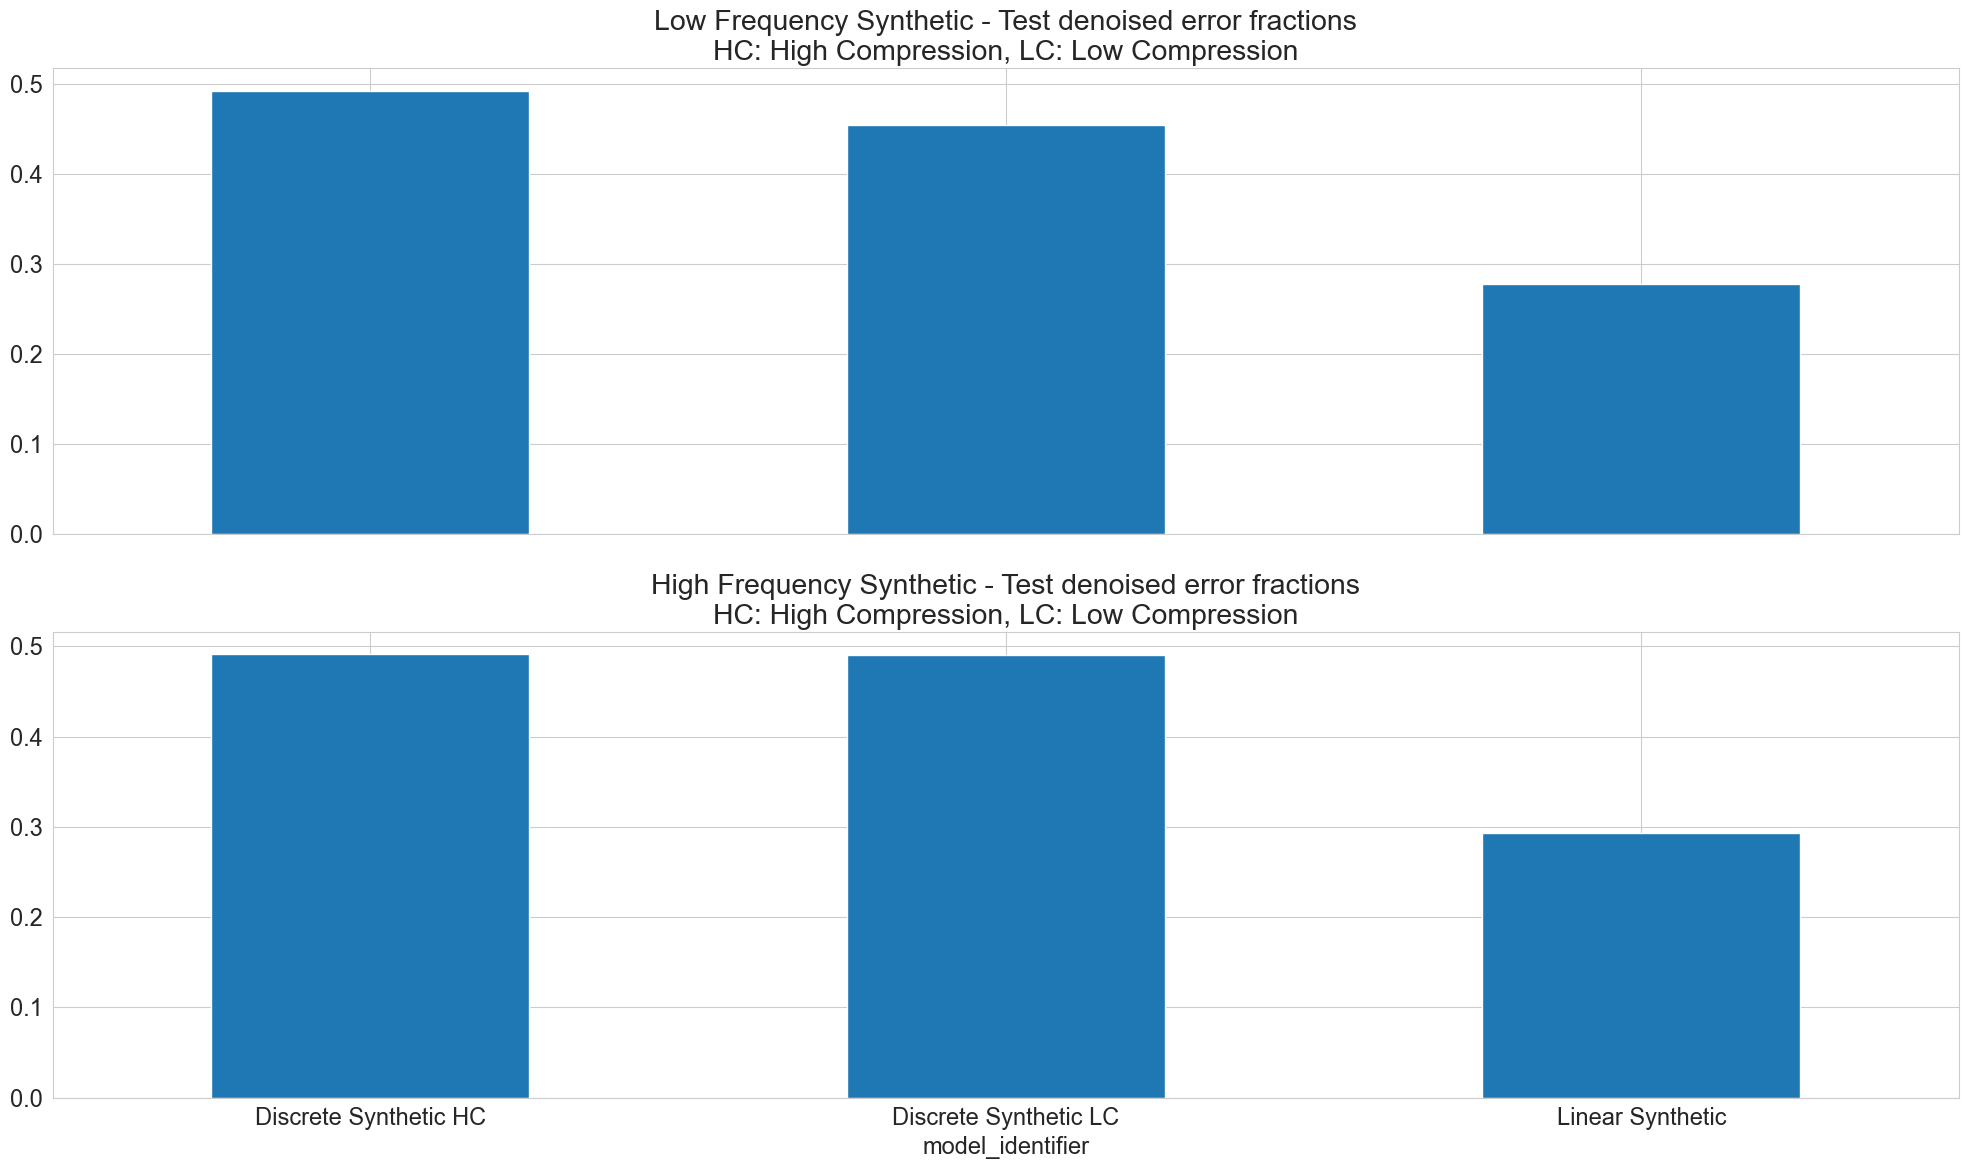

In [152]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), sharex=True)

# ett_small_results["test_denoised_error_fraction"].sort_values(ascending=False).plot(
#     kind="bar",
#     rot=0,
#     ax=axes[0],
#     title="ETT-Small - Test denoised error fractions\nHC: High Compression, LC: Low Compression"
# )

synthetic_hf0_results["test_denoised_error_fraction"].sort_values(ascending=False).plot(
    kind="bar",
    rot=0,
    ax=axes[0], 
    title="Low Frequency Synthetic - Test denoised error fractions\nHC: High Compression, LC: Low Compression"
)

synthetic_hf1_results["test_denoised_error_fraction"].sort_values(ascending=False).plot(
    kind="bar",
    rot=0,
    ax=axes[1], 
    title="High Frequency Synthetic - Test denoised error fractions\nHC: High Compression, LC: Low Compression"
)

plt.tight_layout()
plt.show()

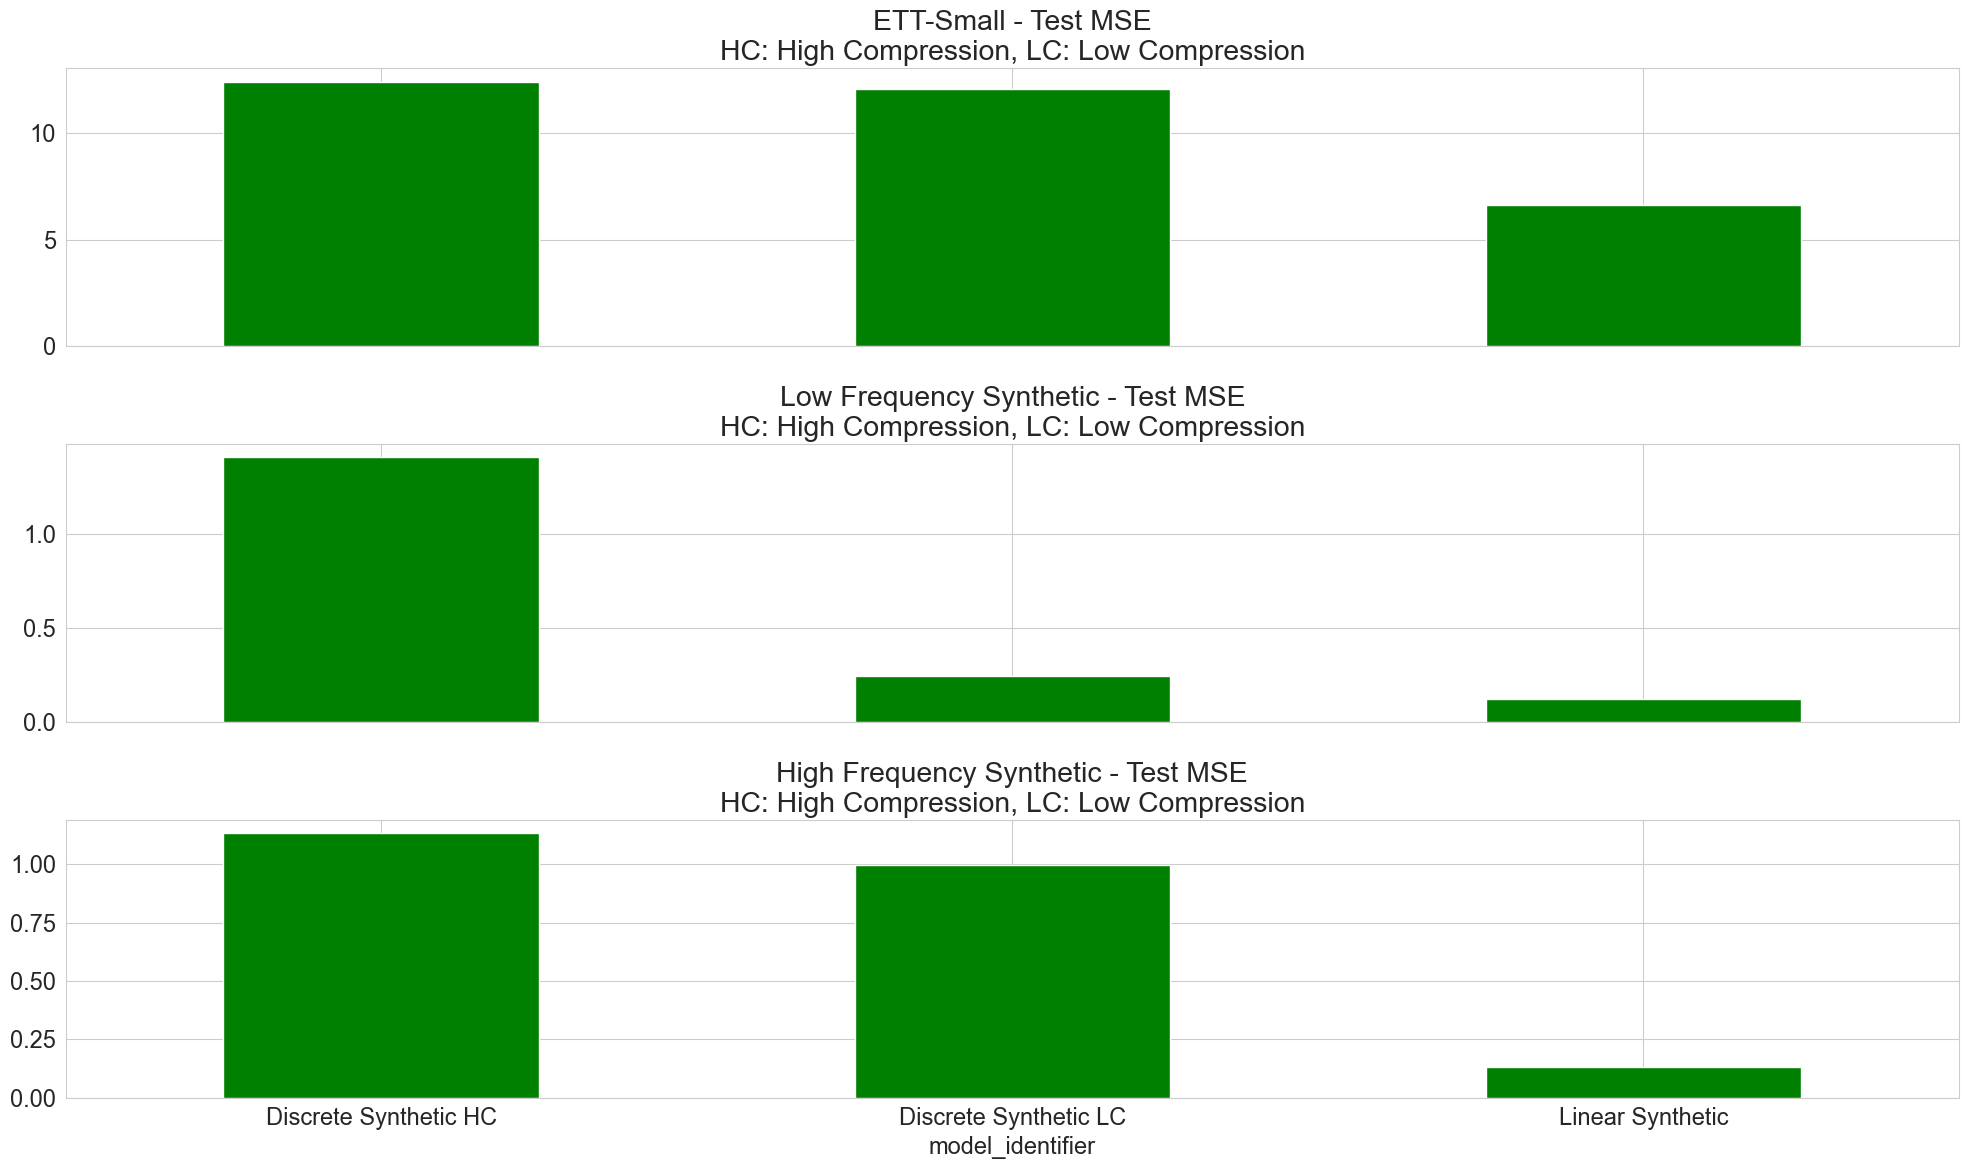

In [153]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharex=True)

ett_small_results["test_mse"].sort_values(ascending=False).plot(
    kind="bar",
    rot=0,
    ax=axes[0],
    title="ETT-Small - Test MSE\nHC: High Compression, LC: Low Compression",
    color="green"
)

synthetic_hf0_results["test_mse"].sort_values(ascending=False).plot(
    kind="bar",
    rot=0,
    ax=axes[1],
    title="Low Frequency Synthetic - Test MSE\nHC: High Compression, LC: Low Compression",
    color="green"
)

synthetic_hf1_results["test_mse"].sort_values(ascending=False).plot(
    kind="bar",
    rot=0,
    ax=axes[2],
    title="High Frequency Synthetic - Test MSE\nHC: High Compression, LC: Low Compression",
    color="green"
)

plt.tight_layout()
plt.show()